In [13]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Read the data
df = pd.read_csv("world_population.csv")
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [4]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Text(0.5, 1.0, 'Distribution of missing values')

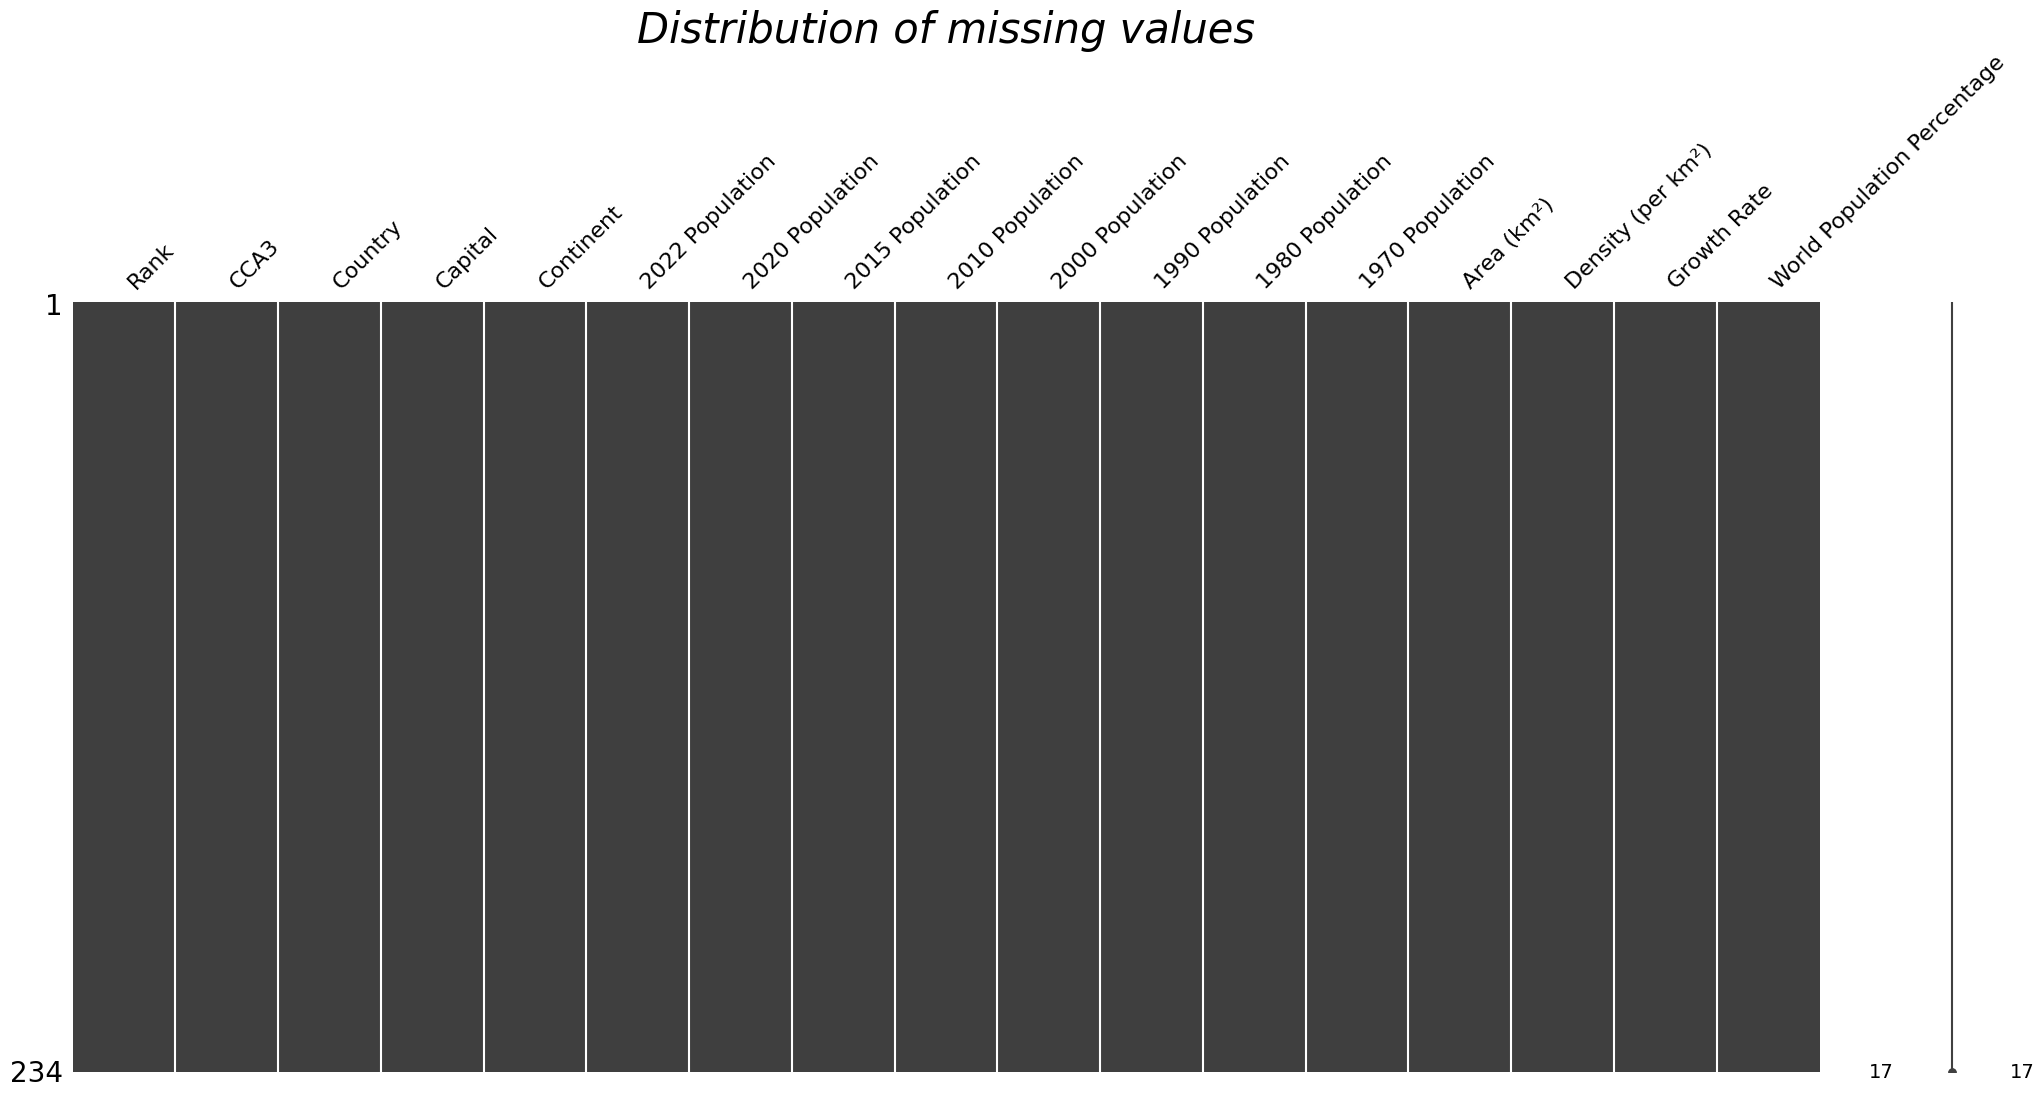

In [6]:
msno.matrix(df)
plt.title("Distribution of missing values", fontsize=30, fontstyle="oblique")
# Observation: there are no missing values

In [7]:
df.shape

(234, 17)

In [73]:
# Population
population = list(reversed(['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population'
              ,'1980 Population', '1970 Population']))

pop_by_year = df[population].sum()
pop_by_year = {'Year' : pop_by_year.index, 'All' : pop_by_year.values}
pop_by_year = pd.DataFrame(pop_by_year)

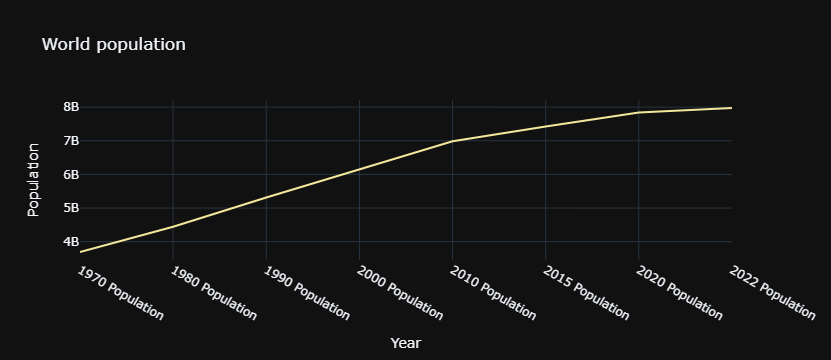

In [91]:
fig = px.line(pop_by_year, x="Year", y="All", title="World population",
             template = 'plotly_dark', color_discrete_sequence = px.colors.sequential.Sunset)

fig.update_layout(xaxis = dict(ticktext = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']))
fig.update_layout({'yaxis':{'title':{'text':'Population'}}})

fig.show()

In [79]:
pop_by_continent

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
Continent,,,,,,,,
Africa,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348
Asia,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290
Europe,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991
North America,600296136,594236593,570383850,542720651,486069584,421266425,368293361,315434606
Oceania,45038554,43933426,40403283,37102764,31222778,26743822,22920240,19480270
South America,436816608,431530043,413134396,393078250,349634282,297146415,241789006,192947156


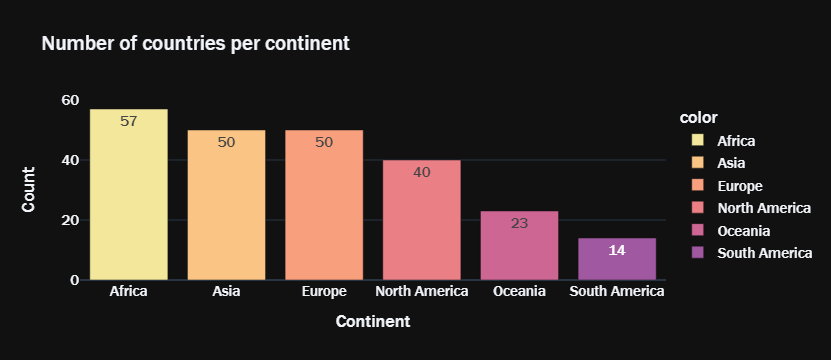

In [106]:
# Number of countries on each continent
country_per_continent = df['Continent'].value_counts()
country_per_continent

fig = px.bar(x=country_per_continent.index, y=country_per_continent.values, color = country_per_continent.index, 
             template = 'plotly_dark', color_discrete_sequence = px.colors.sequential.Sunset, 
             title="Number of countries per continent", text=country_per_continent.values)
fig.update_layout({'xaxis':{'title': {'text' : 'Continent'}}})
fig.update_layout({'yaxis':{'title': {'text' : 'Count'}}})
fig.update_layout(font = dict(size=15,family="Franklin Gothic"))
fig.show()

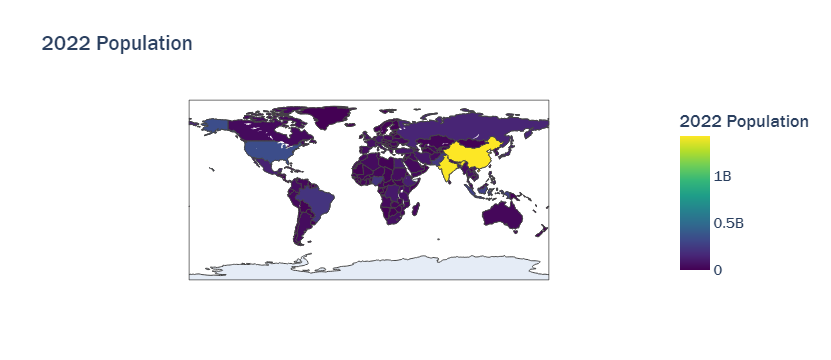

In [107]:
# World plot for 2022
fig = px.choropleth(df, locations='Country', locationmode='country names', color='2022 Population',
                   hover_name='Country', title = '2022 Population', color_continuous_scale='Viridis')
fig.update_layout(font = dict(size=15,family="Franklin Gothic"))
fig.show()

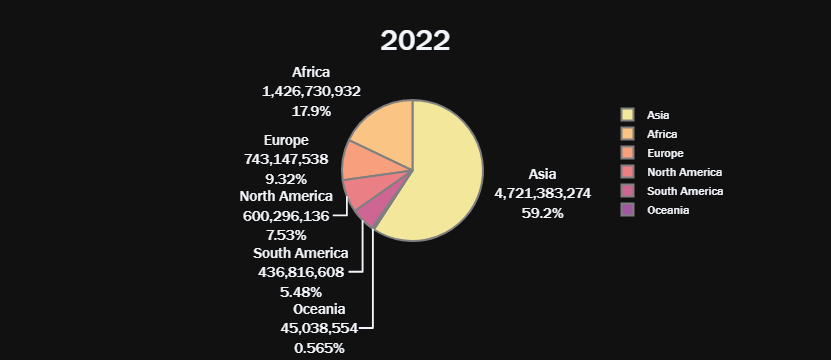

In [123]:
# Summary for 2022 per continent
sum_2022_pop = df.groupby('Continent')['2022 Population'].sum()

# Pie chart
fig = px.pie(values=sum_2022_pop.values, 
             names=sum_2022_pop.index, 
             color_discrete_sequence=px.colors.sequential.Sunset,
             template = 'plotly_dark',
             title = "2022")

fig.update_layout(font = dict(family='Franklin Gothic'))
fig.update_layout(title={'font': {'size': 30}, 'xanchor': 'center', 'x' : 0.5})
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

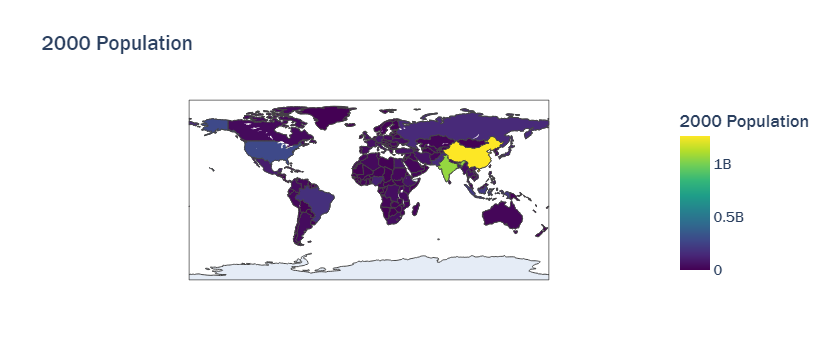

In [121]:
# World plot for 2000
fig = px.choropleth(df, locations='Country', locationmode='country names', color='2000 Population',
                   hover_name='Country', title = '2000 Population', color_continuous_scale='Viridis')
fig.update_layout(font = dict(size=15,family="Franklin Gothic"))
fig.show()

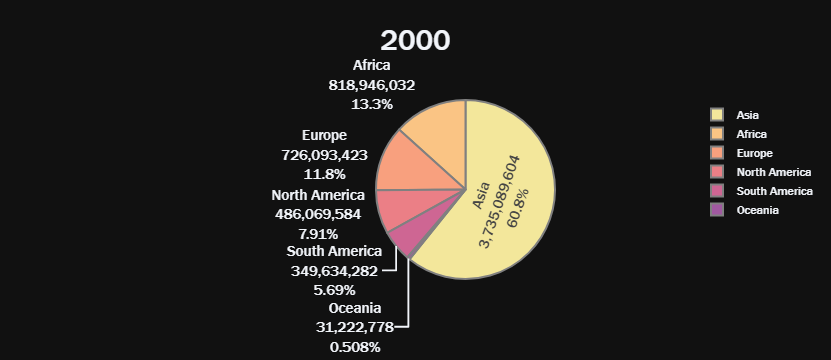

In [127]:
# Summary for 2000 per continent
sum_2000_pop = df.groupby('Continent')['2000 Population'].sum()

# Pie chart
fig = px.pie(values=sum_2000_pop.values, 
             names=sum_2000_pop.index, 
             color_discrete_sequence=px.colors.sequential.Sunset,
             template = 'plotly_dark',
             title = "2000")

fig.update_layout(font = dict(family='Franklin Gothic'))
fig.update_layout(title={'font': {'size': 30}, 'xanchor': 'center', 'x' : 0.5})
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

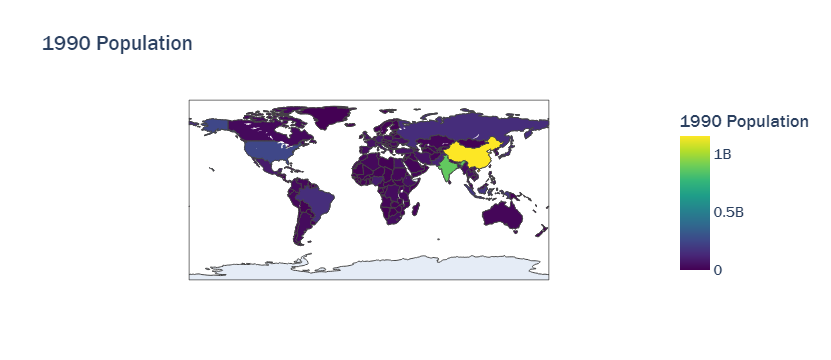

In [128]:
# World plot for 1990
fig = px.choropleth(df, locations='Country', locationmode='country names', color='1990 Population',
                   hover_name='Country', title = '1990 Population', color_continuous_scale='Viridis')
fig.update_layout(font = dict(size=15,family="Franklin Gothic"))
fig.show()

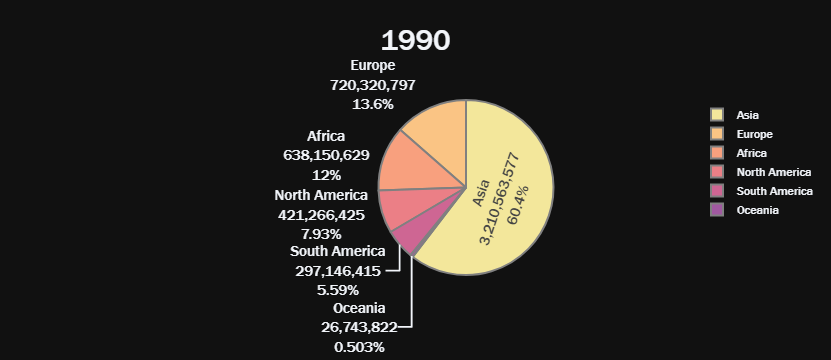

In [126]:
# Summary for 1990 per continent
sum_1990_pop = df.groupby('Continent')['1990 Population'].sum()

# Pie chart
fig = px.pie(values=sum_1990_pop.values, 
             names=sum_1990_pop.index, 
             color_discrete_sequence=px.colors.sequential.Sunset,
             template = 'plotly_dark',
             title = "1990")

fig.update_layout(font = dict(family='Franklin Gothic'))
fig.update_layout(title={'font': {'size': 30}, 'xanchor': 'center', 'x' : 0.5})
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

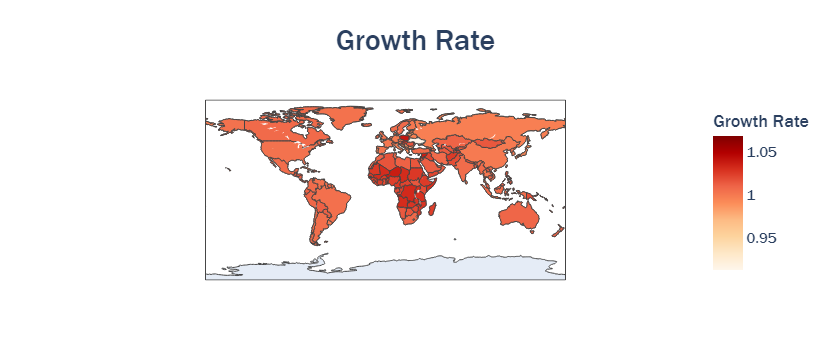

In [131]:
# Which population grows the fastest?
fig = px.choropleth(df, locations="Country", locationmode='country names', color='Growth Rate',
                   hover_name='Country', title = 'Growth Rate', color_continuous_scale='OrRd')
fig.update_layout(font = dict(size = 15, family='Franklin Gothic'))
fig.update_layout(title={'font': {'size': 30}, 'xanchor': 'center', 'x' : 0.5})
fig.show()

In [136]:
# Top 10 countries with the biggest population
df.sort_values(by = "2022 Population", inplace = True, ascending = False)
top10_country = df.iloc[:10]
top10_country = top10_country[['Country', '2022 Population']]
top10_country

,Country,2022 Population
41,China,1425887337
92,India,1417173173
221,United States,338289857
93,Indonesia,275501339
156,Pakistan,235824862
149,Nigeria,218541212
27,Brazil,215313498
16,Bangladesh,171186372
171,Russia,144713314
131,Mexico,127504125


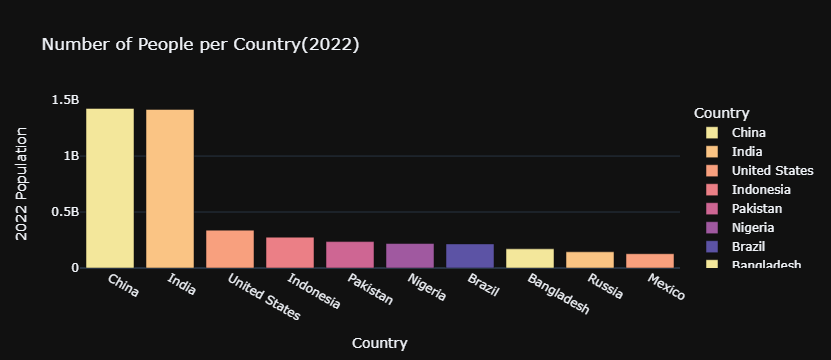

In [150]:
fig = px.bar(top10_country, x="Country", y="2022 Population", color="Country",  
             title = 'Number of People per Country(2022)',
             color_discrete_sequence=px.colors.sequential.Sunset, template='plotly_dark')

fig.show()

In [151]:
# Top 10 countries with the biggest population (1980)
df.sort_values(by = "1980 Population", inplace = True, ascending = False)
top10_country1980 = df.iloc[:10]
top10_country1980 = top10_country1980[['Country', '1980 Population']]
top10_country1980

,Country,1980 Population
41,China,982372466
92,India,696828385
221,United States,223140018
93,Indonesia,148177096
171,Russia,138257420
27,Brazil,122288383
102,Japan,117624196
16,Bangladesh,83929765
156,Pakistan,80624057
74,Germany,77786703


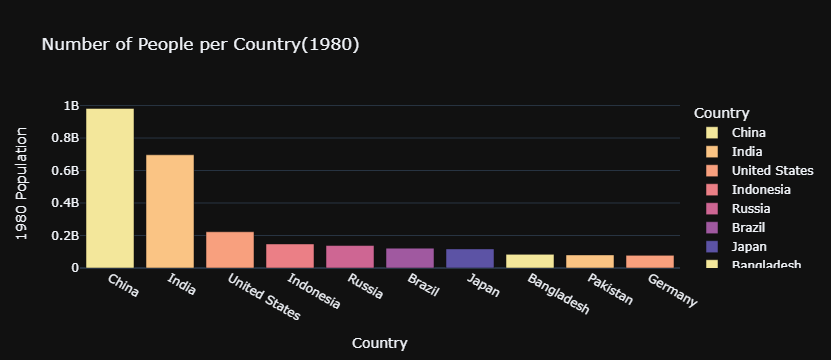

In [152]:
fig = px.bar(top10_country1980, x="Country", y="1980 Population", color="Country",  
             title = 'Number of People per Country(1980)',
             color_discrete_sequence=px.colors.sequential.Sunset, template='plotly_dark')

fig.show()

In [145]:
# Top 10 countries with the smallest population
df.sort_values(by = "2022 Population", inplace = True)
top10_country2 = df.iloc[:10]
top10_country2 = top10_country2[['Country', '2022 Population']]
top10_country2

,Country,2022 Population
226,Vatican City,510
209,Tokelau,1871
150,Niue,1934
64,Falkland Islands,3780
137,Montserrat,4390
177,Saint Pierre and Miquelon,5862
173,Saint Barthelemy,10967
216,Tuvalu,11312
229,Wallis and Futuna,11572
142,Nauru,12668


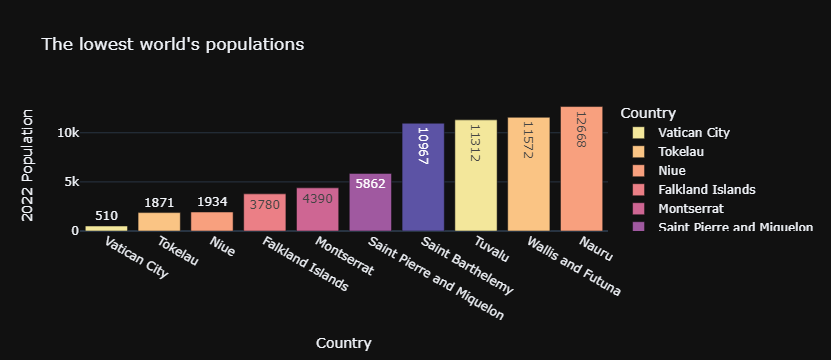

In [156]:
fig = px.bar(top10_country2, x="Country", y="2022 Population", color="Country",  
             title = 'The lowest world\'s populations',
             color_discrete_sequence=px.colors.sequential.Sunset, template='plotly_dark',
             text = "2022 Population")

fig.show()

In [153]:
df.sort_values(by = "1980 Population", inplace = True)
country1980 = df.iloc[:10]
country1980 = country1980[['Country', '1980 Population']]
country1980

,Country,1980 Population
226,Vatican City,733
209,Tokelau,1647
64,Falkland Islands,2240
173,Saint Barthelemy,2983
150,Niue,3637
177,Saint Pierre and Miquelon,6106
6,Anguilla,6560
215,Turks and Caicos Islands,7598
142,Nauru,7635
216,Tuvalu,7731


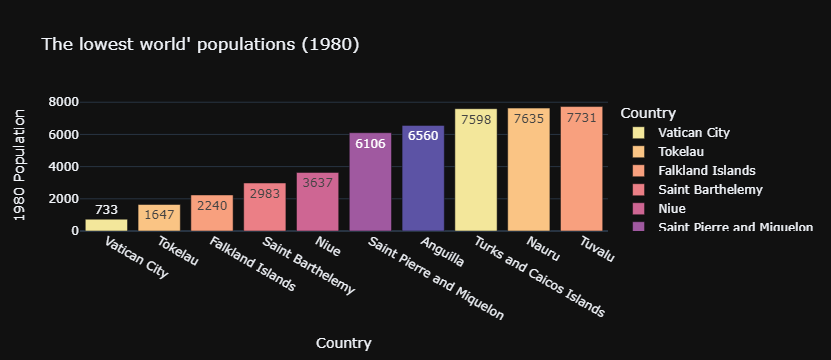

In [157]:
fig = px.bar(country1980, x="Country", y="1980 Population", color="Country",  
             title = 'The lowest world\' populations (1980)',
             color_discrete_sequence=px.colors.sequential.Sunset, template='plotly_dark',
             text = "1980 Population")

fig.show()

In [177]:
# Growth
pop_diff = (df.groupby('Country')["2022 Population"].sum() - df.groupby('Country')["1980 Population"].sum()).sort_values(ascending=False)
pop_diff = pop_diff[:10]


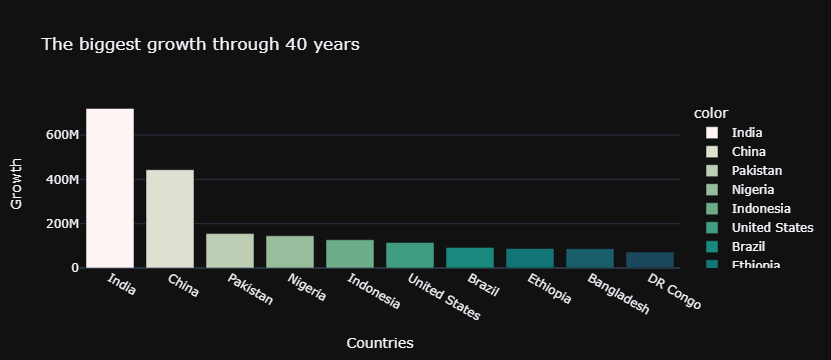

In [178]:
# Bar plot for growth
fig = px.bar(x=pop_diff.index, y=pop_diff.values, title="The biggest growth through 40 years",
            template="plotly_dark", color_discrete_sequence=px.colors.sequential.tempo, color=pop_diff.index)

fig.update_layout({'xaxis':{'title':{'text': 'Countries'}}, 'yaxis': {'title':{'text':'Growth'}}})
fig.show()

In [174]:
# Decline
pop_diff2 = (df.groupby('Country')["2022 Population"].sum() - df.groupby('Country')["1980 Population"].sum()).sort_values(ascending=True)
pop_diff2 = pop_diff2[:10]

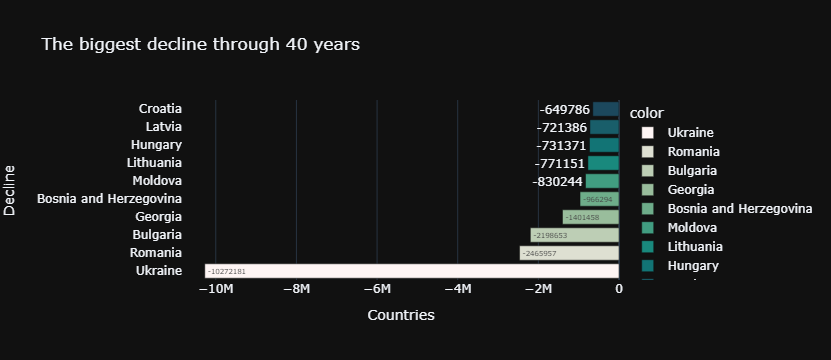

In [175]:
# Bar plot for decline
fig = px.bar(y=pop_diff2.index, x=pop_diff2.values, title="The biggest decline through 40 years",
            template="plotly_dark", color_discrete_sequence=px.colors.sequential.tempo, color=pop_diff2.index,
            text=pop_diff2.values)

fig.update_layout({'xaxis':{'title':{'text': 'Countries'}}, 'yaxis': {'title':{'text':'Decline'}}})
fig.show()

In [184]:
# Numerical variables

# Which countries have the biggest area?
top_area = df.sort_values(by="Area (km²)", ascending=False)[["Country", "Area (km²)"]][:10]
top_area

171           Russia
35            Canada
41             China
221    United States
27            Brazil
11         Australia
92             India
8          Argentina
105       Kazakhstan
2            Algeria
Name: Country, dtype: object

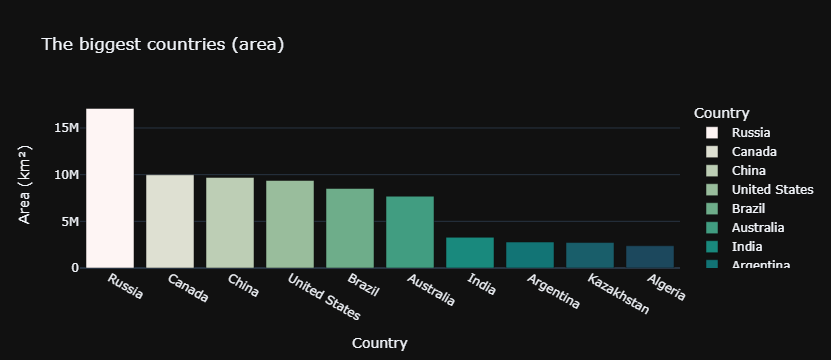

In [186]:
fig = px.bar(top_area, y="Area (km²)", x="Country", title="The biggest countries (area)",
            template="plotly_dark", color_discrete_sequence=px.colors.sequential.tempo,
            color="Country")
fig.show()

In [188]:
# Which countries have the smallest area?
small_area = df.sort_values(by="Area (km²)", ascending=True)[["Country", "Area (km²)"]][:10]
small_area

,Country,Area (km²)
226,Vatican City,1
134,Monaco,2
76,Gibraltar,6
209,Tokelau,12
173,Saint Barthelemy,21
142,Nauru,21
216,Tuvalu,26
119,Macau,30
188,Sint Maarten,34
176,Saint Martin,53


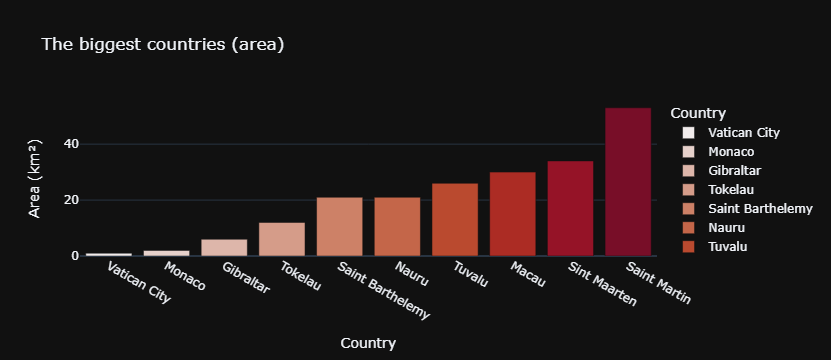

In [190]:
fig = px.bar(small_area, y="Area (km²)", x="Country", title="The biggest countries (area)",
            template="plotly_dark", color_discrete_sequence=px.colors.sequential.amp,
            color="Country")
fig.show()

In [196]:
# The density winners

top_density = df.sort_values(by="Density (per km²)", ascending=False)[['Country', 'Density (per km²)']][:5]

fig = px.bar(top_density, x='Country', y='Density (per km²)', title="The densest countries in the world",
            template='plotly_white',color_discrete_sequence=px.colors.sequential.gray, color='Country')

fig.show()